# heart attack prediction(random forest method)

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
df = pd.read_csv('heart.csv')
Train, Test = train_test_split(df)
X_test=Test.iloc[:,0:-1]
y_test=Test.iloc[:,-1]
print(Train.shape)
print(Test.shape)

(227, 14)
(76, 14)


# default parameter decision tree method

In [46]:
X_train=Train.iloc[:,:-1]
y_train=Train['output']
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
print(X_train.shape)
print(accuracy_score(y_test, Dt.predict(X_test)))

(227, 13)
0.7763157894736842


# random forest method with 1000 trees

In [47]:
start=int(round(time.time()*1000))
Y_pred=pd.DataFrame()
for i in range(100):
    
    #randomly select 227 samples using bootstrap sampling method 
    Train_temp=Train.sample(n=Train.shape[0], replace=True, axis=0)     
    X_train=Train_temp.iloc[:,:-1].copy()
    y_train=Train_temp['output']
    
    #randomly select 4 features(set other features to be 0)
    X_train.iloc[:,np.random.choice(range(0,X_train.shape[1]),12,replace=False,p=[0.1,0.1,0.01,0.15,0.14,0.14,0.14,0.05,0.05,0.05,0.05,0.01,0.01])]=0
    
    #train a decision tree with selected samples and features
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    
    #store prediction of the i_th decision tree in Y_pred(i)
    Y_pred[i]=dt.predict(X_test)
    accuracy_pred = accuracy_score(y_test, Y_pred[i])    #calculate the accuracy
    print(accuracy_pred) 
    
end=int(round(time.time()*1000))
print('Time Taken(milliseconds):{0}'.format(end-start))

0.7763157894736842
0.75
0.7763157894736842
0.7763157894736842
0.7631578947368421
0.7631578947368421
0.75
0.7631578947368421
0.7631578947368421
0.7763157894736842
0.7894736842105263
0.7631578947368421
0.75
0.7631578947368421
0.7894736842105263
0.7894736842105263
0.7631578947368421
0.7105263157894737
0.7763157894736842
0.7631578947368421
0.7631578947368421
0.7631578947368421
0.7894736842105263
0.7763157894736842
0.7631578947368421
0.7631578947368421
0.7631578947368421
0.7763157894736842
0.7631578947368421
0.7631578947368421
0.7763157894736842
0.7631578947368421
0.7631578947368421
0.7631578947368421
0.75
0.7631578947368421
0.7763157894736842
0.7763157894736842
0.7105263157894737
0.7631578947368421
0.7763157894736842
0.7894736842105263
0.75
0.7631578947368421
0.7631578947368421
0.7631578947368421
0.7631578947368421
0.7894736842105263
0.6447368421052632
0.7894736842105263
0.7631578947368421
0.7631578947368421
0.75
0.7763157894736842
0.7631578947368421
0.7763157894736842
0.7631578947368421
0

In [48]:
y_pred=Y_pred.mean(axis=1).round()           #vote for a y_pred by 1000 columns of Y_pred
accuracy = accuracy_score(y_test, y_pred)    #calculate the accuracy
print(accuracy)                              #the overall accuracy improved comparing with single decision tree

0.8289473684210527


# the scatter mattix and pearson correlation matrix shows the Correlation between features are weak.

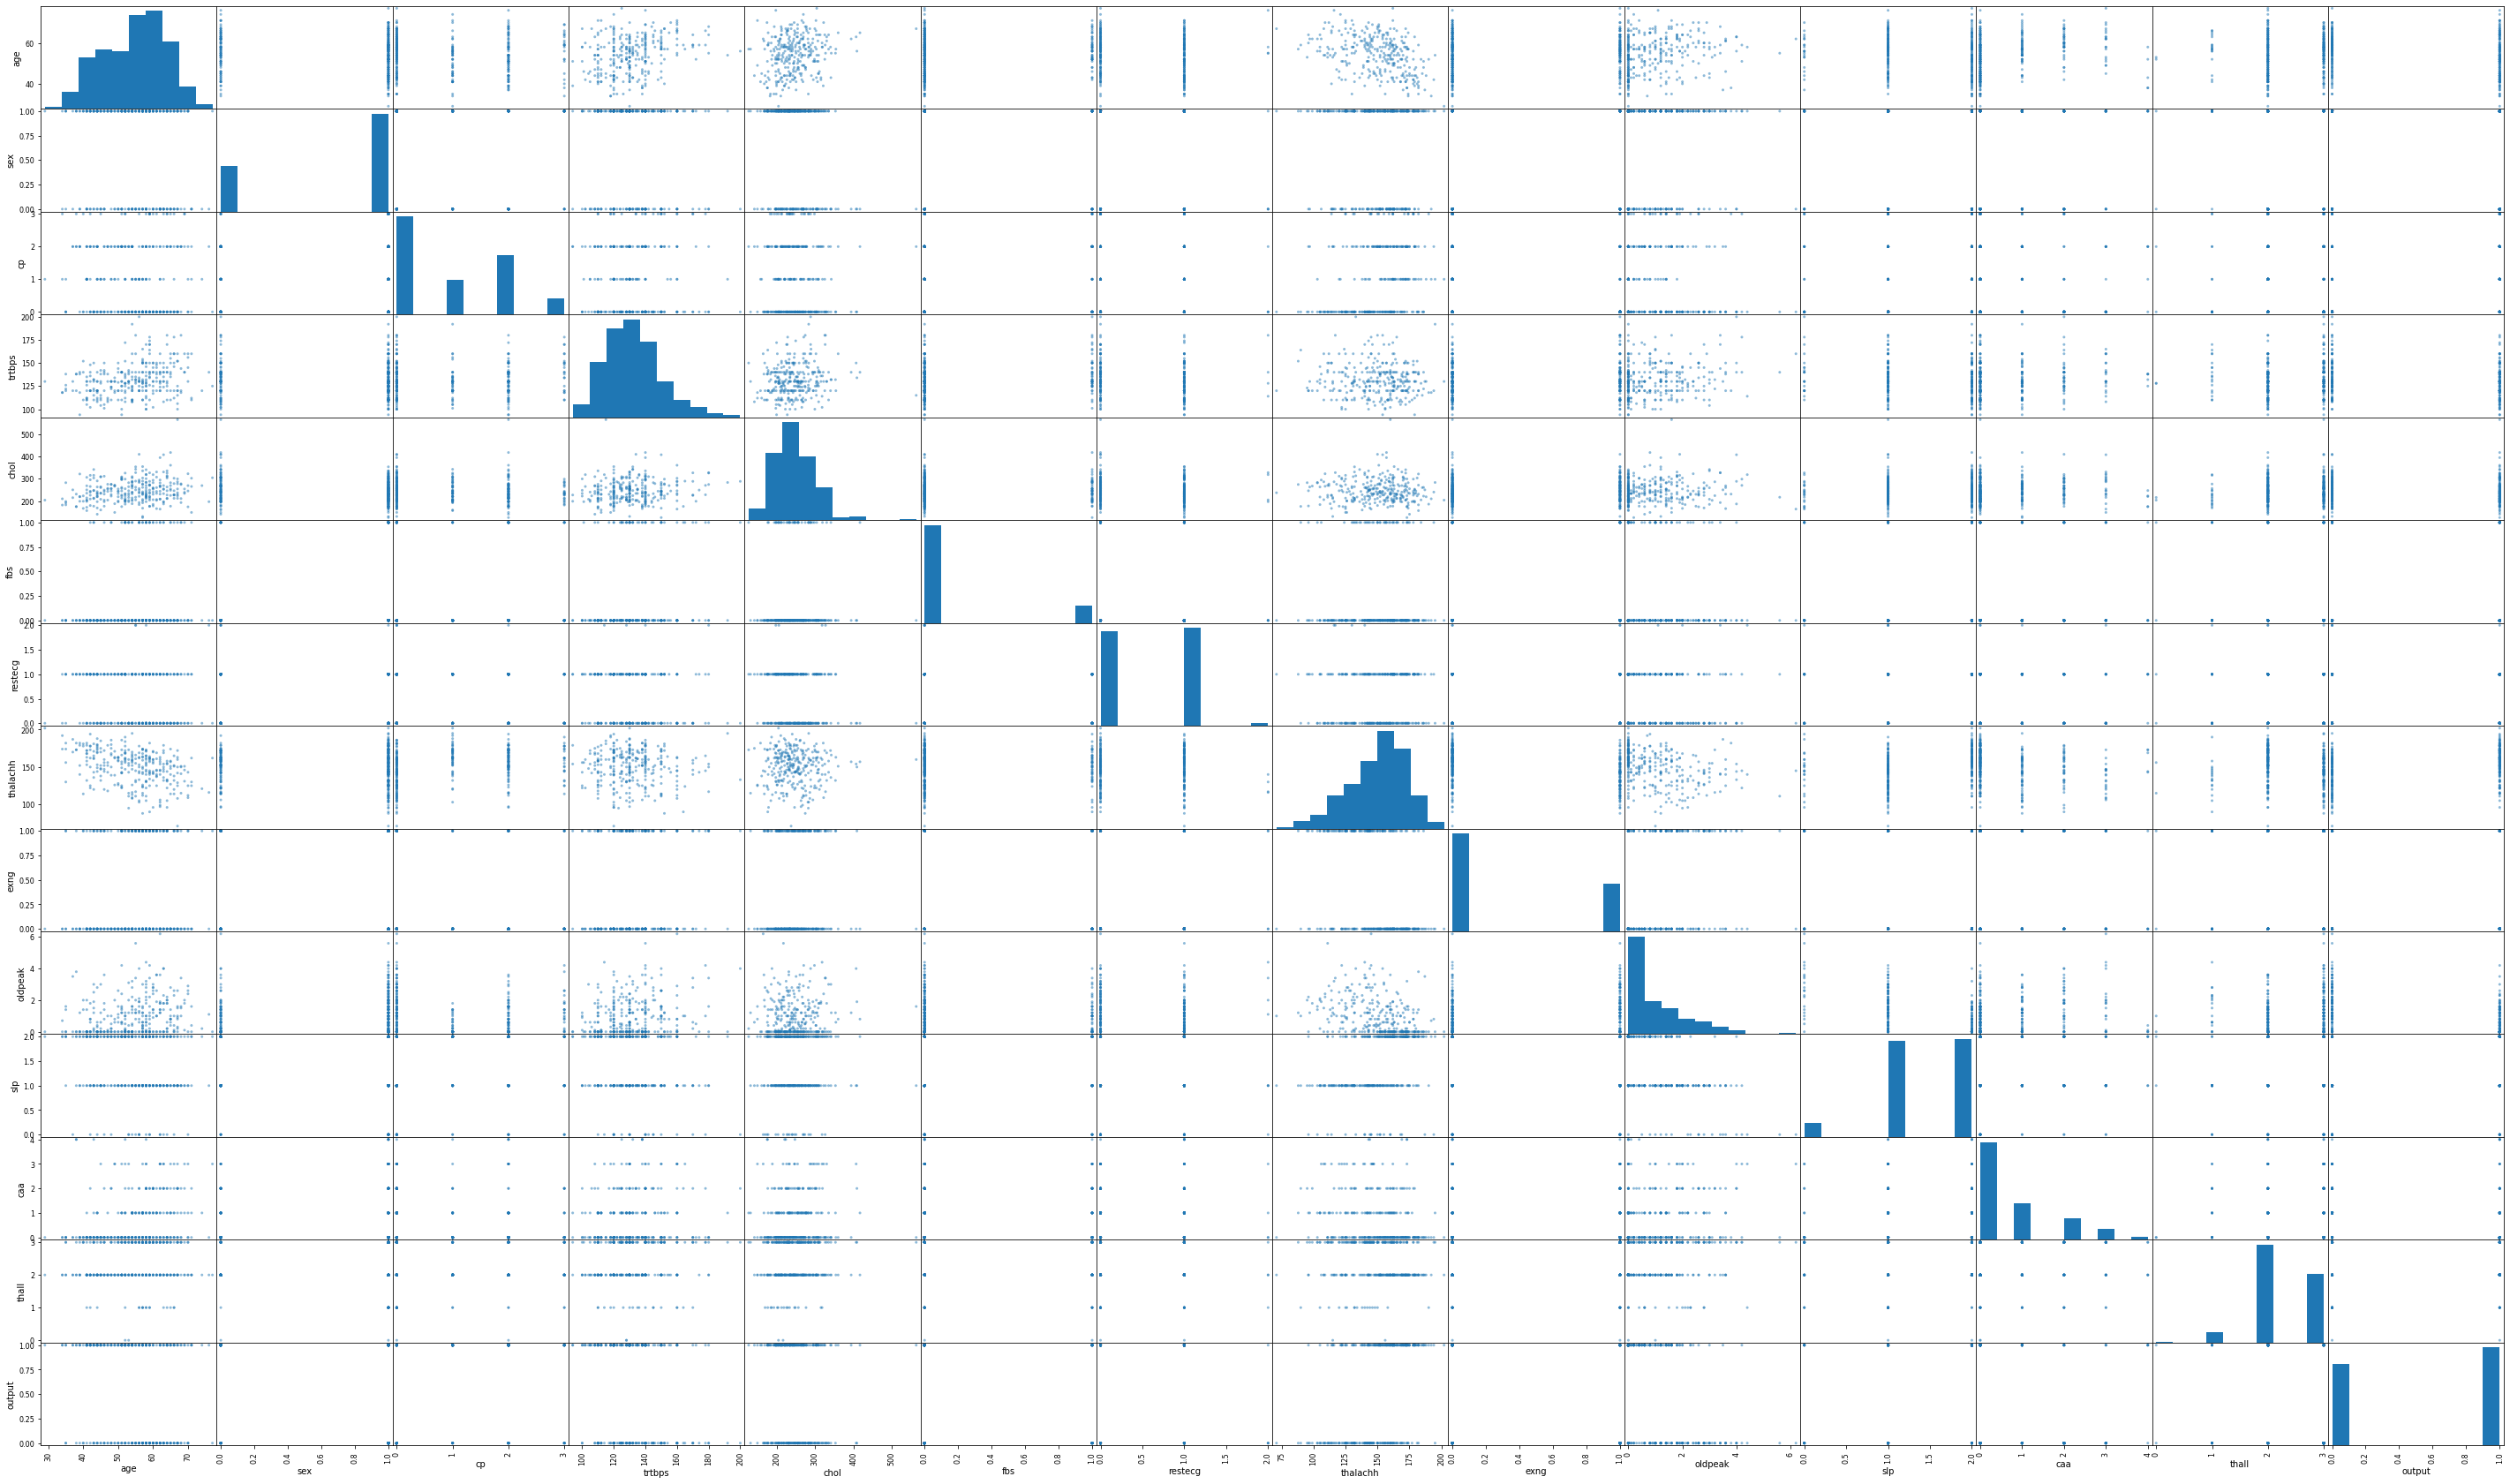

In [49]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(50,30))
plt.show()

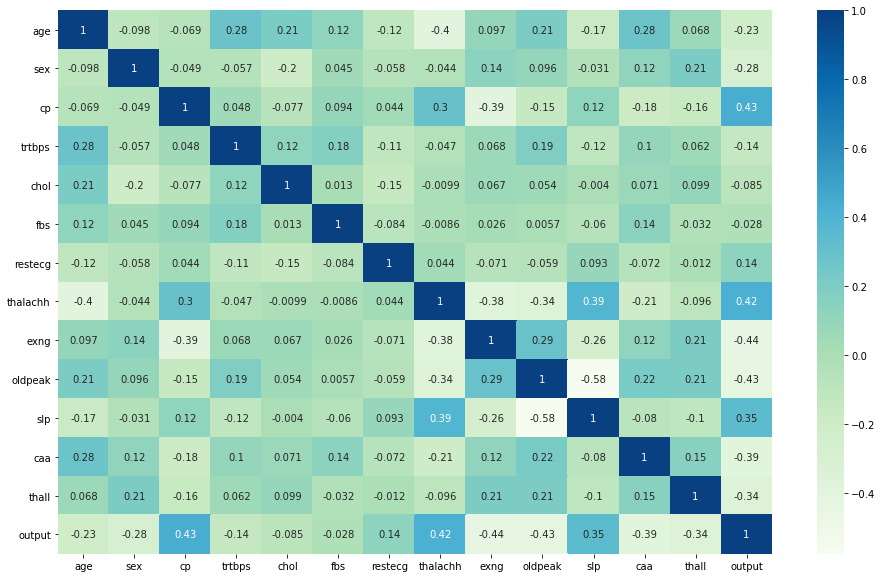

In [50]:
import seaborn as sns
pearson_corr_mat=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(data=pearson_corr_mat,annot=True,cmap='GnBu')
plt.show()

In [ ]:
help(np.random.choice)